# FINAL PROJECT 2 :  Logistic Regression
- Nama : Roiqhatul Inayah
- Kode Peserta : PYTN-KS015-020

# GROUP 2
1. Diva Alvania
2. Gusti Salsatin
3. Roiqhatul Inayah

# outline :


1. Perkenalan
2. Pustaka yang Dibutuhkan
3. Data Loading 
4. Data Cleaning
5. Eksplorasi Data
6. Data Preprocessing
7. Pendefinisian Model
8. Pelatihan Model
9. Evaluasi Model
10. Model Inference
11. Kesimpulan 

# 1. PERKENALAN
## - Latar Belakang
Iklim Australia sangat bervariasi di delapan negara bagian dan wilayahnya. Kebanyakan wilayah Australia memiliki empat musim, sementara musim kering dan hujan berlangsung di wilayah tropis di utara benua. Karena negara ini begitu besar, iklim di Australia sangat berbeda dari satu wilayah ke wilayah lain. Secara umum, ada empat musim di sebagian besar negara ini, sementara Top End (termasuk Darwin, Katherine, Kakadu, dan Arnhem Land), Broome, Kimberley dan Tropical North Queensland (Cairns, Whitsundays, dan Daintree Rainforest) mengalami ‘musim basah’ (November hingga April) dan ‘musim kering’ (Mei hingga Oktober). Musim basah di Australia bagian utara ditandai dengan hari yang sangat panas, kelembapan tinggi, hujan monsun dan mungkin siklon, tetapi juga dengan daya tarik tersendiri. 

Perubahan iklim adalah perubahan yang signifikan kepada iklim, suhu udara dan curah hujan mulai dari dasawarsa sampai jutaan tahun. Perubahan iklim yang terjadi secara global tidak bisa dianggap remeh karena dampaknya bagi kehidupan sangat signifikan dan membahayakan. Konvensi Perserikatan Bangsa-Bangsa (PBB) tentang Kerangka Kerja Perubahan Iklim (United Nations Framework Convention on Climate Change/UNFCCC) mendefinisikan penyebab perubahan iklim global baik secara langsung atau tidak langsung adalah dipengaruhi aktivitas manusia sehingga mengubah komposisi dari atmosfer global dan variabilitas iklim alami pada periode waktu yang dapat diperbandingkan. Maka dari itu, periode iklim sudah tidak terlalu akurat lagi. Hujan bisa saja terjadi diluar periode musim basah, dan sebaliknya.

Untuk membantu masyarakat Australia dalam memprediksi hujan di hari esok, maka akan dibuat sebuah aplikasi prediksi hujan dengan perbandingan metode logistic regression, decision tree, dan random forest.

## - Data yang digunakan
Dataset yang digunakan yaitu Rain in Australia yang berisi record data hujan harian selama 10 tahun di Australia. Kolom RainTomorrow adalah target variable yang mau diprediksi. Jika “Yes” maka besok harinya disana hujan 1mm atau lebih. Dataset ini memiliki 23 atribut, antara lain:
- Date: tanggal hari itu
- Location: lokasi, nama kota di Australia
- MinTemp: temperatur terendah hari itu dalam celcius
- MaxTemp: temperatur tertinggi hari itu dalam celcius
- Rainfall: jumlah curah hujan hari itu dalam mm
- Evaporation: jumlah evaporasi dalam mm dari Class A pan selama 24 jam sebelum jam 9 pagi hari itu
- Sunshine: jumlah jam hari itu cerah dengan cahaya matahari
- WindGustDir: arah kecepatan angin yang paling tinggi selama 24 jam sebelum jam 12 malam hari itu
- WindGustSpeed: kecepatan angin yang paling tinggi dalam km/jam selama 24 jam sebelum jam 12 malam hari itu
- WindDir9am: arah angin jam 9 pagi
- WindDir3pm: arah angin jam 3 sore
- WindSpeed9am: kecepatan angin jam 9 pagi dalam km/jam dihitung dari rata-rata kecepatan angin 10 menit sebelum jam 3 sore
- WindSpeed3pm: kecepatan angin jam 3 sore dalam km/jam dihitung dari rata-rata kecepatan angin 10 menit sebelum jam 3 sore
- Humidity9am: humiditas jam 9 pagi dalam persen
- Humidity3pm: humiditas jam 3 sore dalam persen
- Pressure9am: tekanan udara jam 9 pagi dalam hpa
- Pressure3pm: tekanan udara jam 3 sore dalam hpa
- Cloud9am: persentase langit yang tertutup awan jam 9 pagi. dihitung dalam oktas, unit ⅛, menghitung berapa unit ⅛ dari langit yang tertutup awan. Jika 0, langit cerah, jika 8, langit sepenuhnya tertutup awan.
- Cloud3pm: persentase langit yang tertutup awan jam 3 sore
- Temp9am: temperatur jam 9 pagi dalam celcius
- Temp3pm: temperatur jam 3 sore dalam celcius
- RainToday: apakah hari ini hujan: jika curah hujan 24 jam sebelum jam 9 pagi melebihi 1mm, maka nilai ini adalah 1, jika tidak maka 0.

## - Objective
Objective yang ingin dicapai dalam analisis ini, yaitu:

1. Mengetahui faktor-faktor yang berpengaruh signifikan dalam memprediksi hujan di Australia.
2. Menemukan model terbaik untuk digunakan dalam memprediksi hujan di Australia.
3. Memberikan insight yang dapat membantu pihak penduduk dalam bentuk charts.

# 2. PUSTAKA YG DIBUTUHKAN

In [1]:
# Library For DataFrame
import pandas as pd
from numpy import mean
import numpy as np

# For visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,f1_score, precision_score, recall_score, mean_squared_error

# Mengatur display agar maximal
pd.options.display.max_rows = None
pd.options.display.max_columns = None

# For Data Exploration
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import missingno as msno

# For Modelling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import mean_squared_error 
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

# For ignore warning
import warnings
warnings.filterwarnings('ignore')

# For API Adjustment
import pickle

# Style Text
bold = '\033[1m'
normal = '\033[0m'

# 3. DATA LOADING
## Import Data

In [2]:
df = pd.read_csv("weatherAUS.csv") # Mengambil data
pd.set_option("display.max_columns", None) # melihat isi kolom tanpa batasan

## Load Dataset

In [3]:
df.head() # Melihat 5 data paling atas 

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df.tail() # Melihat 5 data terbawah

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,ESE,17.0,17.0,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


## Inspection of the amount of data held

In [5]:
len(df) # Mendata Jumlah banyak data (baris)

145460

In [6]:
len(df.columns) # Mendata Jumlah banyaknya Kolom Pada Data

23

In [7]:
# Conclusion
# Melihat jumlah baris dan jumlah kolom pada data
print("Dari data tersebut di dapatkan jumlah baris terdiri dari",bold, len(df), normal, "dan jumlah kolom berjumlah",bold,len(df.columns))

Dari data tersebut di dapatkan jumlah baris terdiri dari  145460  dan jumlah kolom berjumlah  23


## Missing value inspection

In [8]:
dt = pd.DataFrame({"Missing_Value":df.isna().sum(), "Percent":df.apply(lambda x: f'{((x.isnull().sum()/df.shape[0])*100).round(2)} %')})
dt

,Missing_Value,Percent
Date,0,0.0 %
Location,0,0.0 %
MinTemp,1485,1.02 %
MaxTemp,1261,0.87 %
Rainfall,3261,2.24 %
Evaporation,62790,43.17 %
Sunshine,69835,48.01 %
WindGustDir,10326,7.1 %
WindGustSpeed,10263,7.06 %
WindDir9am,10566,7.26 %


<Figure size 640x480 with 0 Axes>

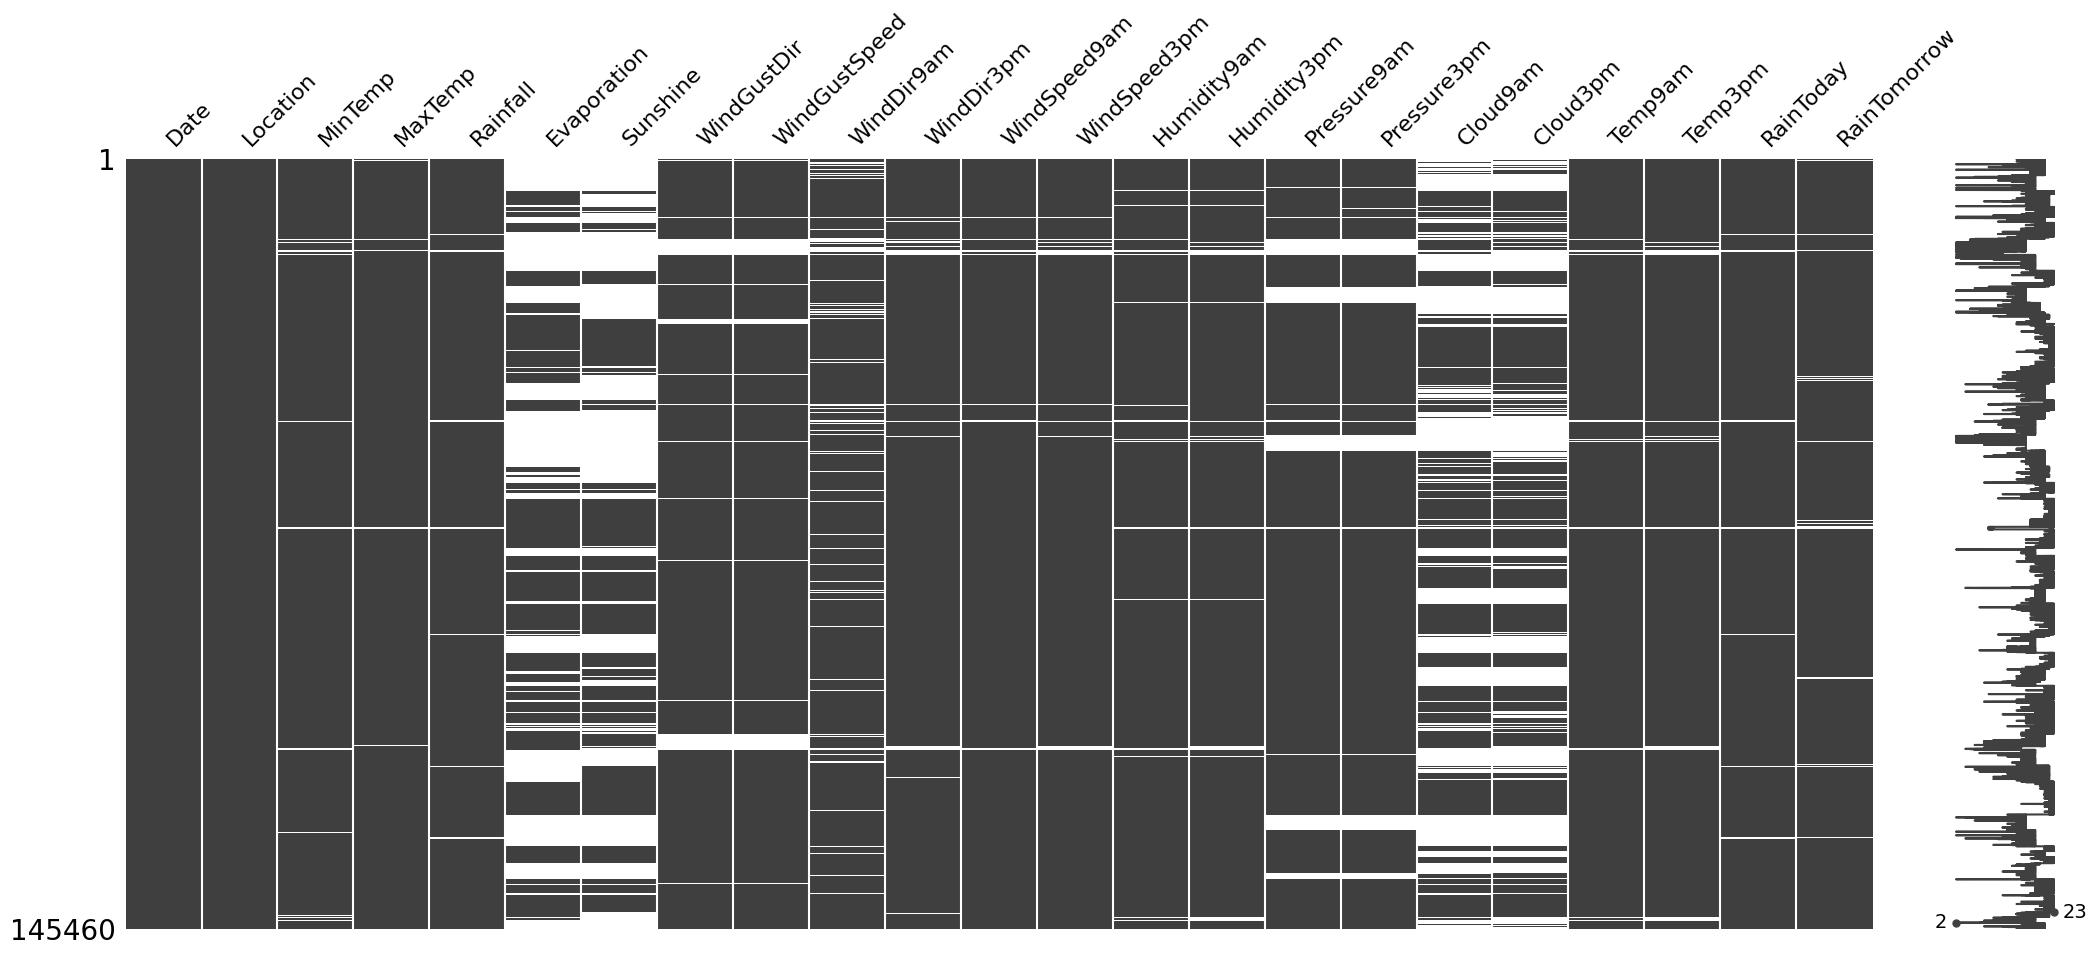

In [9]:
plt.savefig("msno_matrix.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

msno.matrix(df);

## Describe Data

In [10]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


# 4. DATA CLEANING
## Handling missing value

In [11]:
df.dropna(subset=['RainToday','RainTomorrow'], inplace=True) #Menghapus kolom RainToday dan RainTomorrow
df.shape #Melihat total baris dan kolom pada df

(140787, 23)

In [12]:
dt

,Missing_Value,Percent
Date,0,0.0 %
Location,0,0.0 %
MinTemp,1485,1.02 %
MaxTemp,1261,0.87 %
Rainfall,3261,2.24 %
Evaporation,62790,43.17 %
Sunshine,69835,48.01 %
WindGustDir,10326,7.1 %
WindGustSpeed,10263,7.06 %
WindDir9am,10566,7.26 %


## Delete missing value data above 35%

In [13]:
df.drop(columns=['Evaporation','Sunshine','Cloud9am','Cloud3pm'],inplace=True, axis=1)
df.shape

(140787, 19)

## Copy DataFrame

In [14]:
df_clean = df.copy()
df_clean.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [15]:
df_clean['MinTemp']=df_clean['MinTemp'].fillna(df_clean['MinTemp'].mean()) # Fill MinTemp and MaxTemp by using mean
df_clean['MaxTemp']=df_clean['MaxTemp'].fillna(df_clean['MaxTemp'].mean())

df_clean['Rainfall']=df_clean['Rainfall'].fillna(df_clean['Rainfall'].mean()) # Fill Rainfall by using mean

df_clean['WindGustSpeed']=df_clean['WindGustSpeed'].fillna(df_clean['WindGustSpeed'].mean()) # Fill WindGustSpeed by using mean

df_clean['WindSpeed9am']=df_clean['WindSpeed9am'].fillna(df_clean['WindSpeed9am'].mean()) # Fill WindSpeed9am and WindSpeed3pm by using mean
df_clean['WindSpeed3pm']=df_clean['WindSpeed3pm'].fillna(df_clean['WindSpeed3pm'].mean())

df_clean['Humidity9am']=df_clean['Humidity9am'].fillna(df_clean['Humidity9am'].mean()) # Fill Humidity9am and Humidity3pm by using mean
df_clean['Humidity3pm']=df_clean['Humidity3pm'].fillna(df_clean['Humidity3pm'].mean())

df_clean['Pressure9am']=df_clean['Pressure9am'].fillna(df_clean['Pressure9am'].mean()) # Fill Pressure9am and Pressure3pm by using mean
df_clean['Pressure3pm']=df_clean['Pressure3pm'].fillna(df_clean['Pressure3pm'].mean())

df_clean['Temp9am']=df_clean['Temp3pm'].fillna(df_clean['Temp9am'].mean()) # Fill Temp9am and Temp3pm by using mean
df_clean['Temp3pm']=df_clean['Temp3pm'].fillna(df_clean['Temp3pm'].mean())

In [16]:
df_clean.isnull().sum() #Mengecek missing value

Date                0
Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
WindGustDir      9163
WindGustSpeed       0
WindDir9am       9660
WindDir3pm       3670
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Temp9am             0
Temp3pm             0
RainToday           0
RainTomorrow        0
dtype: int64

## Remove missing object value by using drop

In [17]:
df_clean.dropna(axis=0, inplace=True) #Menghapus missing value
df_clean.isnull().sum() #Mengecek missing value

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

## Change and Delete
### Change data type - Date

In [18]:
df_clean["Date"] = pd.to_datetime(df_clean["Date"])
df_clean['Day']=pd.DatetimeIndex(df_clean['Date']).day
df_clean['Month']=pd.DatetimeIndex(df_clean['Date']).month
df_clean['Year']=pd.DatetimeIndex(df_clean['Date']).year

In [19]:
df_clean.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,21.8,21.8,No,No,1,12,2008
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,24.3,24.3,No,No,2,12,2008
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,23.2,23.2,No,No,3,12,2008
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,26.5,26.5,No,No,4,12,2008
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,29.7,29.7,No,No,5,12,2008


### Delete data type - Date

In [20]:
df_clean = df_clean.drop(columns="Date")
df_clean.head(5)

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,21.8,21.8,No,No,1,12,2008
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,24.3,24.3,No,No,2,12,2008
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,23.2,23.2,No,No,3,12,2008
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,26.5,26.5,No,No,4,12,2008
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,29.7,29.7,No,No,5,12,2008


#  5. EKSPLORASI DATA

In [21]:
df_clean.info() # Melihat Informasi lebih detail mengenai struktur DataFrame dapat dilihat menggunakan fungsi info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123710 entries, 0 to 145458
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       123710 non-null  object 
 1   MinTemp        123710 non-null  float64
 2   MaxTemp        123710 non-null  float64
 3   Rainfall       123710 non-null  float64
 4   WindGustDir    123710 non-null  object 
 5   WindGustSpeed  123710 non-null  float64
 6   WindDir9am     123710 non-null  object 
 7   WindDir3pm     123710 non-null  object 
 8   WindSpeed9am   123710 non-null  float64
 9   WindSpeed3pm   123710 non-null  float64
 10  Humidity9am    123710 non-null  float64
 11  Humidity3pm    123710 non-null  float64
 12  Pressure9am    123710 non-null  float64
 13  Pressure3pm    123710 non-null  float64
 14  Temp9am        123710 non-null  float64
 15  Temp3pm        123710 non-null  float64
 16  RainToday      123710 non-null  object 
 17  RainTomorrow   123710 non-nul

## Correlation 1
### Correlation 1: Group all columns that contain category data
#### Creating Categorical Column

In [22]:
categ_col = [
    "Location",
    "WindGustDir",
    "WindDir9am",
    "WindDir3pm",
    "RainToday",
    "RainTomorrow",
    "Day",
    "Month",
    "Year"
]

df_categ = df_clean[categ_col]

df_categ.head(5)

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow,Day,Month,Year
0,Albury,W,W,WNW,No,No,1,12,2008
1,Albury,WNW,NNW,WSW,No,No,2,12,2008
2,Albury,WSW,W,WSW,No,No,3,12,2008
3,Albury,NE,SE,E,No,No,4,12,2008
4,Albury,W,ENE,NW,No,No,5,12,2008


#### Correlation 1: Label Encode Data

In [23]:
Lenc = LabelEncoder()

df_categ["Location"] = Lenc.fit_transform(df_categ["Location"])
df_categ["WindGustDir"] = Lenc.fit_transform(df_categ["WindGustDir"])
df_categ["WindDir9am"] = Lenc.fit_transform(df_categ["WindDir9am"])
df_categ["WindDir3pm"] = Lenc.fit_transform(df_categ["WindDir3pm"])
df_categ["RainToday"] = Lenc.fit_transform(df_categ["RainToday"])
df_categ["RainTomorrow"] = Lenc.fit_transform(df_categ["RainTomorrow"])
df_categ["Day"] = Lenc.fit_transform(df_categ["Day"])
df_categ["Month"] = Lenc.fit_transform(df_categ["Month"])
df_categ["Year"] = Lenc.fit_transform(df_categ["Year"])

df_categ.head(5)

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow,Day,Month,Year
0,1,13,13,14,0,0,0,11,1
1,1,14,6,15,0,0,1,11,1
2,1,15,13,15,0,0,2,11,1
3,1,4,9,0,0,0,3,11,1
4,1,13,1,7,0,0,4,11,1


#### Correlation 1: Creating Data Correlation

In [24]:
corr_categ = df_categ.corr()
corr_categ

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow,Day,Month,Year
Location,1.000000,0.032922,-0.017452,0.020391,-0.002843,-0.001890,0.000473,-0.007448,0.031467
WindGustDir,0.032922,1.000000,0.408314,0.601815,0.135595,0.050900,-0.000090,0.046756,-0.006542
WindDir9am,-0.017452,0.408314,1.000000,0.319399,0.172744,0.031439,-0.005831,0.017667,0.000307
WindDir3pm,0.020391,0.601815,0.319399,1.000000,0.125807,0.027110,0.001253,0.034892,-0.005966
RainToday,-0.002843,0.135595,0.172744,0.125807,1.000000,0.315867,0.004062,0.007735,-0.012518
RainTomorrow,-0.001890,0.050900,0.031439,0.027110,0.315867,1.000000,0.005322,0.005723,-0.013528
Day,0.000473,-0.000090,-0.005831,0.001253,0.004062,0.005322,1.000000,0.014998,-0.005300
Month,-0.007448,0.046756,0.017667,0.034892,0.007735,0.005723,0.014998,1.000000,-0.117016
Year,0.031467,-0.006542,0.000307,-0.005966,-0.012518,-0.013528,-0.005300,-0.117016,1.000000


#### Correlation 1: Data Visualization

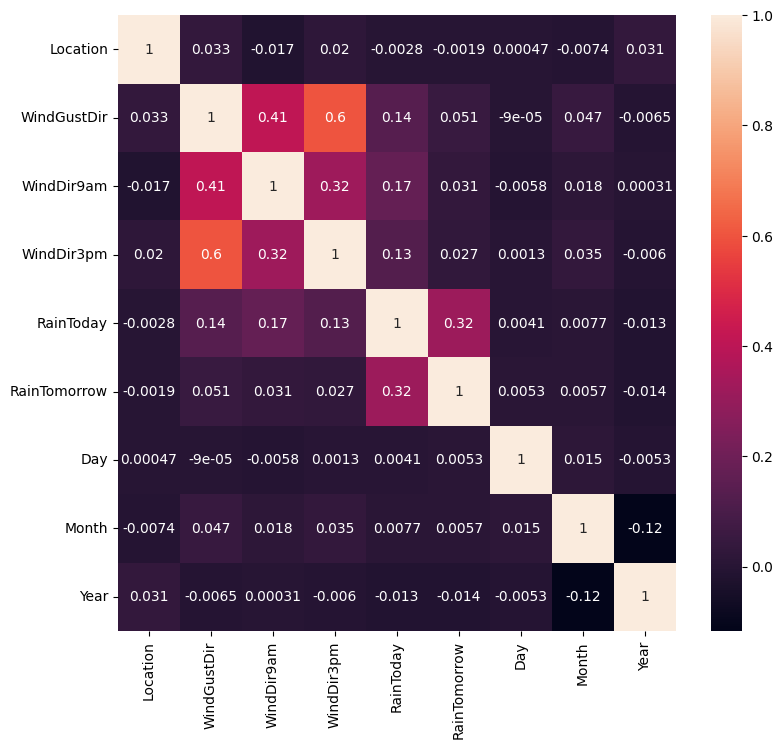

In [25]:
plt.figure(figsize=(9,8))

sns.heatmap(corr_categ, annot=True)

# Save Plot
plt.savefig("corr_categ.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

plt.show();

#### Drop Data

In [26]:
df_pred=df_clean.drop(columns=["WindDir9am","WindDir3pm"])

#### Explaining Data

In [27]:
df_categ.describe()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow,Day,Month,Year
count,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000
mean,22.755242,7.727241,7.269259,7.773591,0.224363,0.221421,14.709781,5.431824,5.806111
std,13.616245,4.664946,4.551131,4.618254,0.417164,0.415205,8.788908,3.475113,2.528473
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,3.000000,3.000000,4.000000,0.000000,0.000000,7.000000,2.000000,4.000000
50%,23.000000,8.000000,7.000000,8.000000,0.000000,0.000000,15.000000,5.000000,6.000000
75%,34.000000,12.000000,11.000000,12.000000,0.000000,0.000000,22.000000,8.000000,8.000000
max,46.000000,15.000000,15.000000,15.000000,1.000000,1.000000,30.000000,11.000000,10.000000


## Data Inspection
### Linkage of Day and RainTomorrow data
#### Linkage of Day and RainTomorrow data - No

In [28]:
dNRT = pd.DataFrame(df_pred[(df_pred['RainTomorrow']=="No")].groupby('Day').count()['RainTomorrow'].sort_values(ascending=True))
dNRT

,RainTomorrow
Day,
31,1871
30,2837
29,2903
28,3090
21,3096
22,3099
10,3122
3,3132
24,3132


#### Visualization : Linkage of Day and RainTomorrow data - No

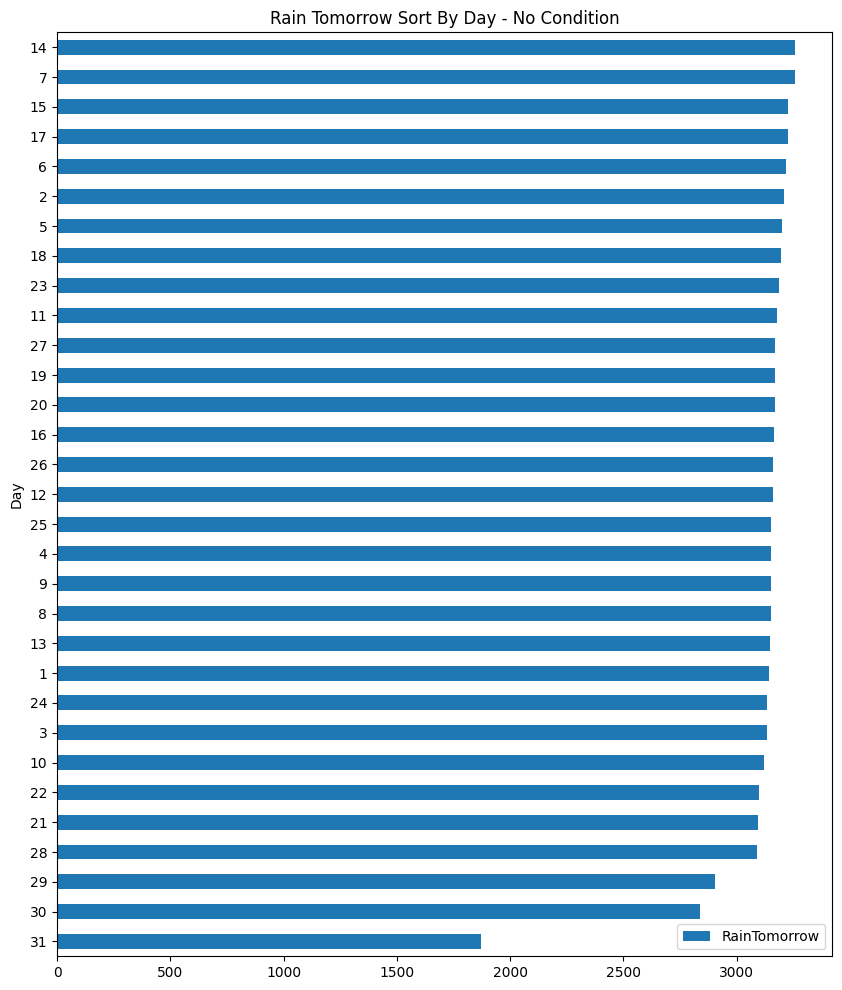

In [29]:
dNRT.plot(kind="barh", title="Rain Tomorrow Sort By Day - No Condition", figsize=(10,12));

# Save Plot
plt.savefig("vis_day_rt_n.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

#### Linkage of Day and RainTomorrow data - Yes

In [30]:
dYRT = pd.DataFrame(df_pred[(df_pred['RainTomorrow']=="Yes")].groupby('Day').count()['RainTomorrow'].sort_values(ascending=True))
dNRT

,RainTomorrow
Day,
31,1871
30,2837
29,2903
28,3090
21,3096
22,3099
10,3122
3,3132
24,3132


#### Visualization : Linkage of Day and RainTomorrow data - Yes

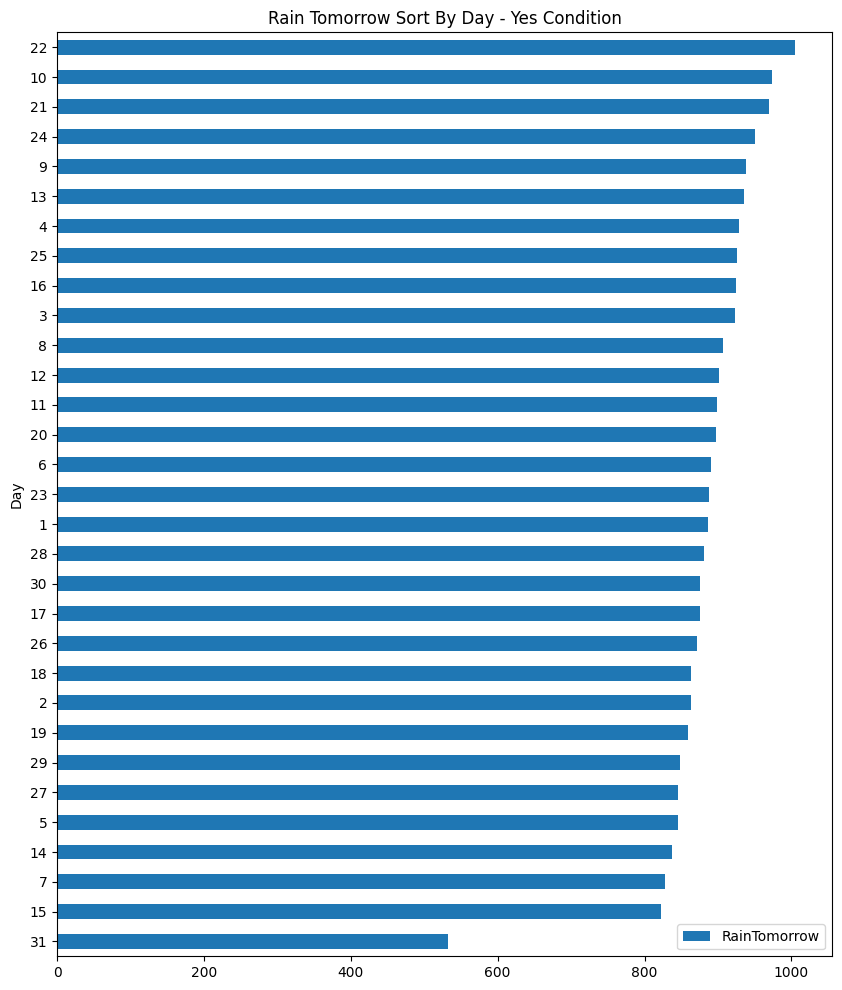

In [31]:
dYRT.plot(kind="barh", title="Rain Tomorrow Sort By Day - Yes Condition", figsize=(10,12));

# Save Plot
plt.savefig("vis_day_rt_y.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

## Correlation 2
### Creating Numerical Column

In [32]:
numer_col = [
    "MinTemp",
    "MaxTemp",
    "Rainfall",
    "WindGustSpeed",
    "WindSpeed9am",
    "WindSpeed3pm",
    "Humidity9am",
    "Humidity3pm",
    "Pressure9am",
    "Pressure3pm",
    "Temp9am",
    "Temp3pm",
    "RainTomorrow"
]

df_numer = df_clean[numer_col]

df_numer.head(5)

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainTomorrow
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,21.8,21.8,No
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,24.3,24.3,No
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,23.2,23.2,No
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,26.5,26.5,No
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,29.7,29.7,No


### Correlation 2 : Visualization All Atribute

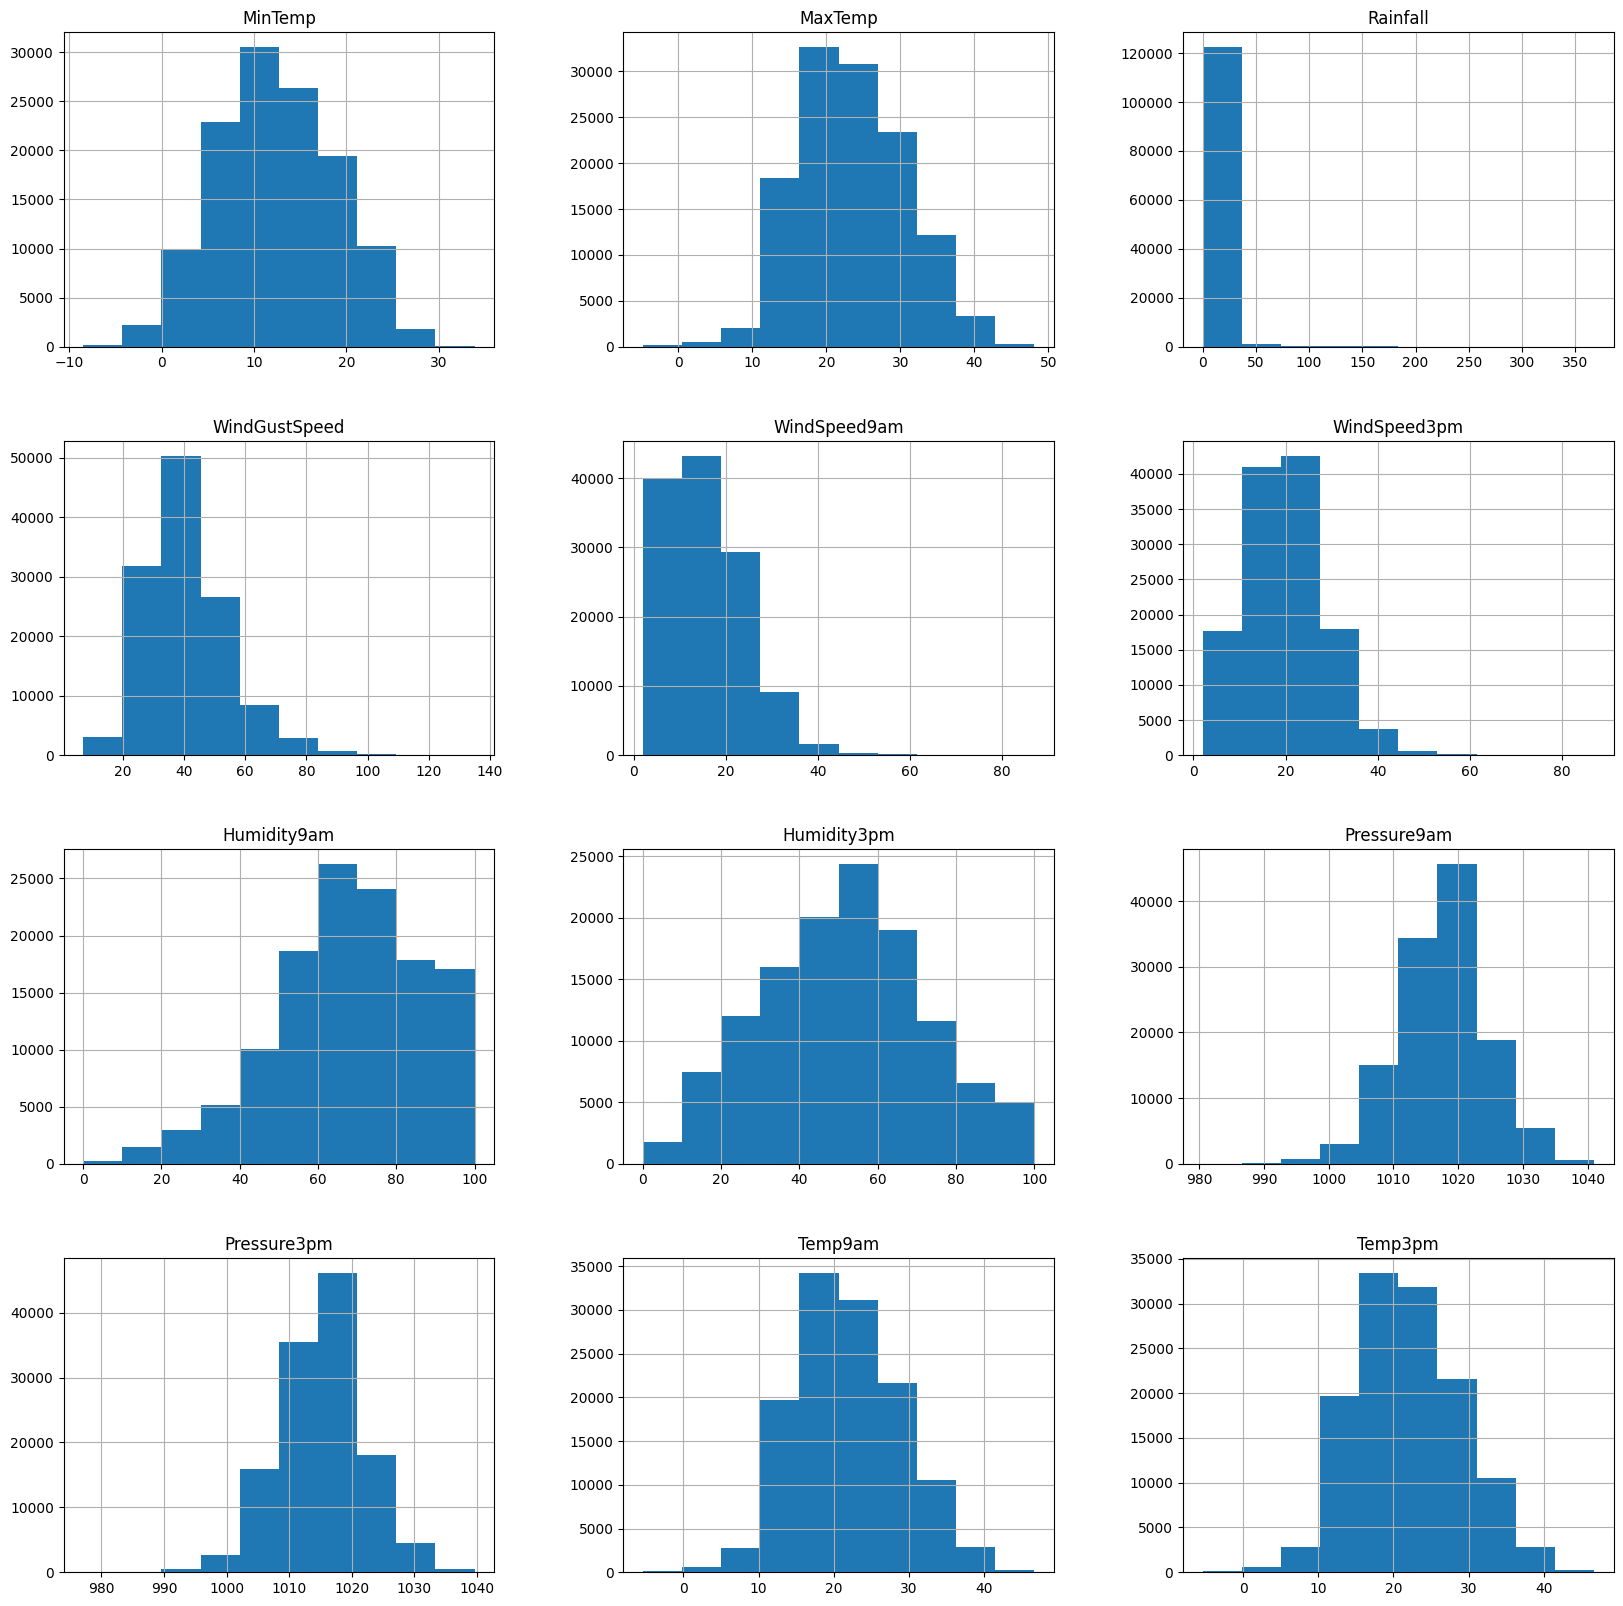

In [33]:
df_clean[numer_col].hist(bins=10, figsize = (20,20))

# Save Plot
plt.savefig("numer_col.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

plt.show()

### Correlation 2: Creating Data Correlation

In [34]:
corr_num = df_numer.corr()
corr_num

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.738283,0.099872,0.141259,0.138219,0.153703,-0.216670,-0.000882,-0.415805,-0.431130,0.700887,0.706245
MaxTemp,0.738283,1.000000,-0.079862,0.037297,-0.015504,0.024165,-0.505134,-0.508545,-0.297541,-0.391772,0.968851,0.975000
Rainfall,0.099872,-0.079862,1.000000,0.131532,0.085619,0.060373,0.236880,0.258584,-0.164740,-0.124274,-0.084461,-0.083478
WindGustSpeed,0.141259,0.037297,0.131532,1.000000,0.591774,0.675796,-0.176426,-0.011814,-0.424451,-0.380524,0.003257,0.003189
WindSpeed9am,0.138219,-0.015504,0.085619,0.591774,1.000000,0.504546,-0.219122,-0.012809,-0.193749,-0.143782,-0.023684,-0.024687
WindSpeed3pm,0.153703,0.024165,0.060373,0.675796,0.504546,1.000000,-0.100647,0.043991,-0.271338,-0.232225,0.004361,0.002926
Humidity9am,-0.216670,-0.505134,0.236880,-0.176426,-0.219122,-0.100647,1.000000,0.678741,0.108827,0.159279,-0.498432,-0.499824
Humidity3pm,-0.000882,-0.508545,0.258584,-0.011814,-0.012809,0.043991,0.678741,1.000000,-0.033966,0.043456,-0.560441,-0.561195
Pressure9am,-0.415805,-0.297541,-0.164740,-0.424451,-0.193749,-0.271338,0.108827,-0.033966,1.000000,0.959545,-0.251580,-0.254417
Pressure3pm,-0.431130,-0.391772,-0.124274,-0.380524,-0.143782,-0.232225,0.159279,0.043456,0.959545,1.000000,-0.351112,-0.355199


### Correlation 2: Data Visualization

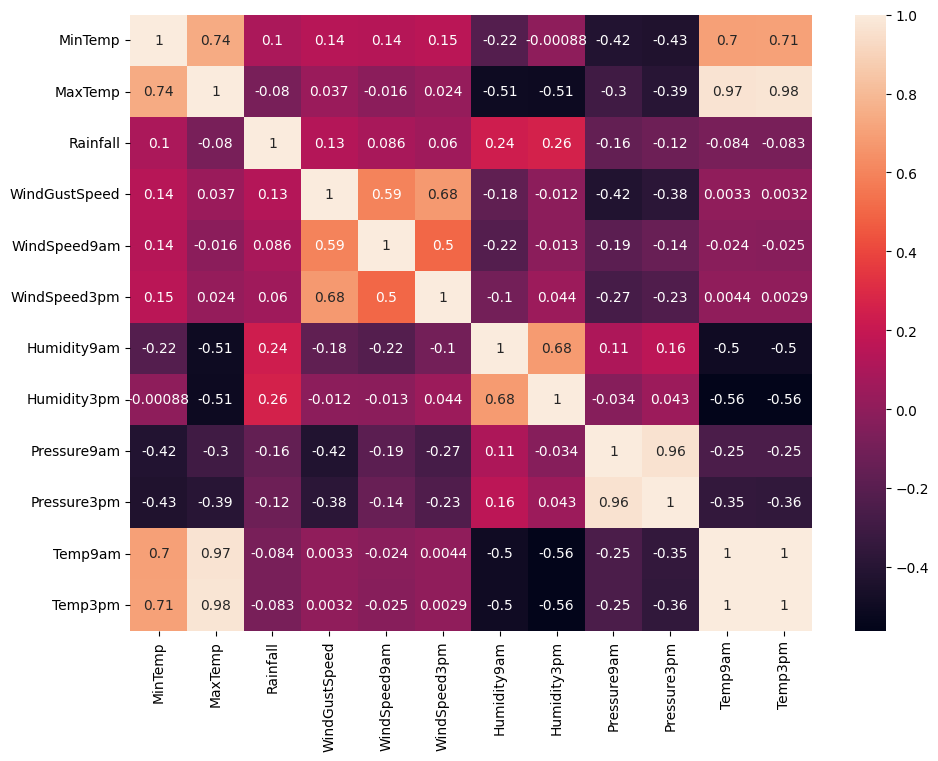

In [35]:
plt.figure(figsize=(11,8))

sns.heatmap(corr_num, annot=True)
# Save Plot
plt.savefig("corr_heatmap_num.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')
plt.show();


### Explaining Data

In [36]:
corr_num

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.738283,0.099872,0.141259,0.138219,0.153703,-0.216670,-0.000882,-0.415805,-0.431130,0.700887,0.706245
MaxTemp,0.738283,1.000000,-0.079862,0.037297,-0.015504,0.024165,-0.505134,-0.508545,-0.297541,-0.391772,0.968851,0.975000
Rainfall,0.099872,-0.079862,1.000000,0.131532,0.085619,0.060373,0.236880,0.258584,-0.164740,-0.124274,-0.084461,-0.083478
WindGustSpeed,0.141259,0.037297,0.131532,1.000000,0.591774,0.675796,-0.176426,-0.011814,-0.424451,-0.380524,0.003257,0.003189
WindSpeed9am,0.138219,-0.015504,0.085619,0.591774,1.000000,0.504546,-0.219122,-0.012809,-0.193749,-0.143782,-0.023684,-0.024687
WindSpeed3pm,0.153703,0.024165,0.060373,0.675796,0.504546,1.000000,-0.100647,0.043991,-0.271338,-0.232225,0.004361,0.002926
Humidity9am,-0.216670,-0.505134,0.236880,-0.176426,-0.219122,-0.100647,1.000000,0.678741,0.108827,0.159279,-0.498432,-0.499824
Humidity3pm,-0.000882,-0.508545,0.258584,-0.011814,-0.012809,0.043991,0.678741,1.000000,-0.033966,0.043456,-0.560441,-0.561195
Pressure9am,-0.415805,-0.297541,-0.164740,-0.424451,-0.193749,-0.271338,0.108827,-0.033966,1.000000,0.959545,-0.251580,-0.254417
Pressure3pm,-0.431130,-0.391772,-0.124274,-0.380524,-0.143782,-0.232225,0.159279,0.043456,0.959545,1.000000,-0.351112,-0.355199


### Handling Outlier Values
#### See the value of the upper limit and lower limit

In [37]:
q1 = df_numer.quantile(0.25) # Lower Limit
q3 = df_numer.quantile(0.75) # Upper Limit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import folium


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import svm
import sklearn.metrics as metrics

from time import time
from six import StringIO
from sklearn import tree
import sklearn.tree as tree
from IPython.display import Image
import pydotplus
import joblib
import pickle
Iqr = q3-q1

#### Apply into dataframe

In [38]:
up_limit = pd.DataFrame({"Upper Limit":q3+1.5*Iqr}) # Upper Limit

low_limit = pd.DataFrame({"Lower Limit":q1-1.5*Iqr}) # Lower Limit

df_quartile = pd.concat([up_limit, low_limit], axis=1) # apply into dataframe
df_quartile

,Upper Limit,Lower Limit
MinTemp,30.80,-6.00
MaxTemp,44.35,2.35
Rainfall,2.00,-1.20
WindGustSpeed,73.50,5.50
WindSpeed9am,36.50,-7.50
WindSpeed3pm,40.50,-3.50
Humidity9am,118.50,18.50
Humidity3pm,108.50,-7.50
Pressure9am,1034.45,1000.45
Pressure3pm,1032.20,997.80


### Visualization
#### Temperature data visualization

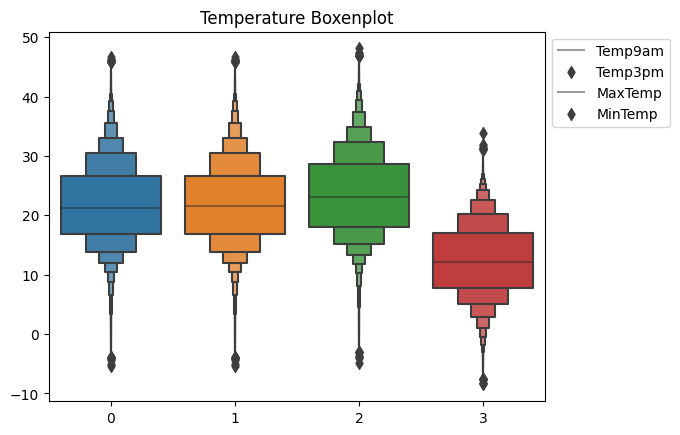

In [39]:
label=['Temp9am','Temp3pm','MaxTemp','MinTemp']
data=[df_numer['Temp9am'],df_numer['Temp3pm'], df_numer['MaxTemp'],df_numer['MinTemp']]

sns.boxenplot(data=data);
# Save Plot
plt.savefig("boxenplot_temperature.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

plt.title('Temperature Boxenplot');
plt.legend(labels=label, loc=2,bbox_to_anchor=(1,1));

#### Rainfall Tomorrow Prosentase

Text(0.5, 28.597222222222207, 'Hari besok Hujan')

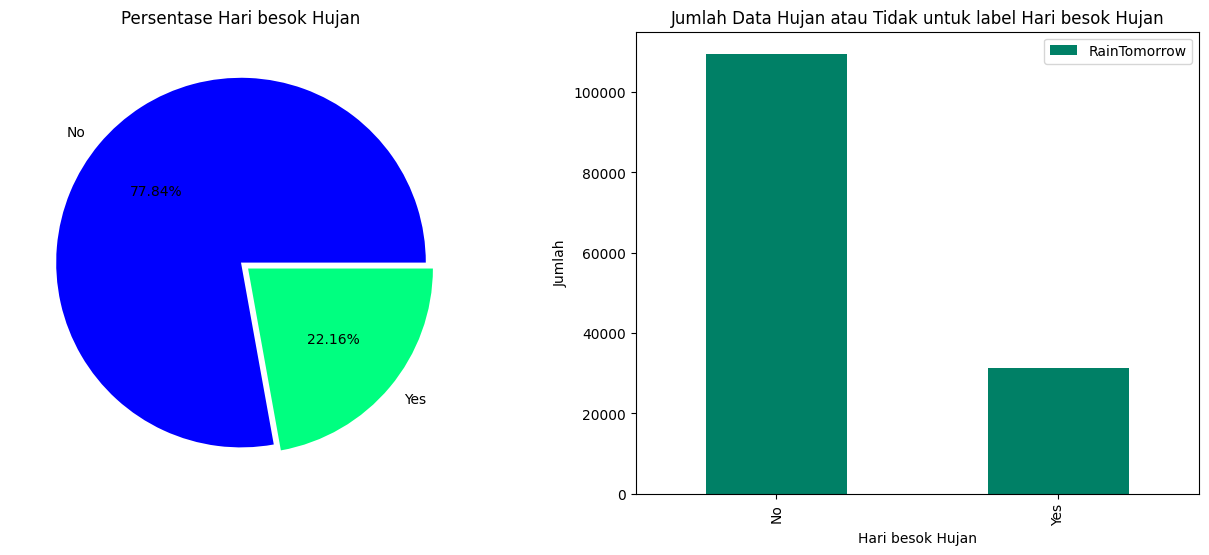

In [40]:
fig, ax = plt.subplots(1,2,figsize=(16,6))

# persentase "Hari besok Hujan"
df['RainTomorrow'].value_counts().plot(
    kind='pie',
    autopct='%.2f%%',
    explode=[0,0.05], 
    cmap='winter',
    shadow=False,
    ax=ax[0]
)
ax[0].set_title('Persentase Hari besok Hujan')
ax[0].set_ylabel('')

# Barchart besaran setiap nilai pada kelas target
df.groupby('RainTomorrow').agg({'RainTomorrow':'count'}).plot(
    kind='bar',
    ax=ax[1],
    cmap='summer'
)

# Save Plot
plt.savefig("rainfall_tomorrow.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

ax[1].set_title('Jumlah Data Hujan atau Tidak untuk label Hari besok Hujan')
ax[1].set_ylabel('Jumlah')
ax[1].set_xlabel('Hari besok Hujan')

#### Rainfall and Humidity data visualization

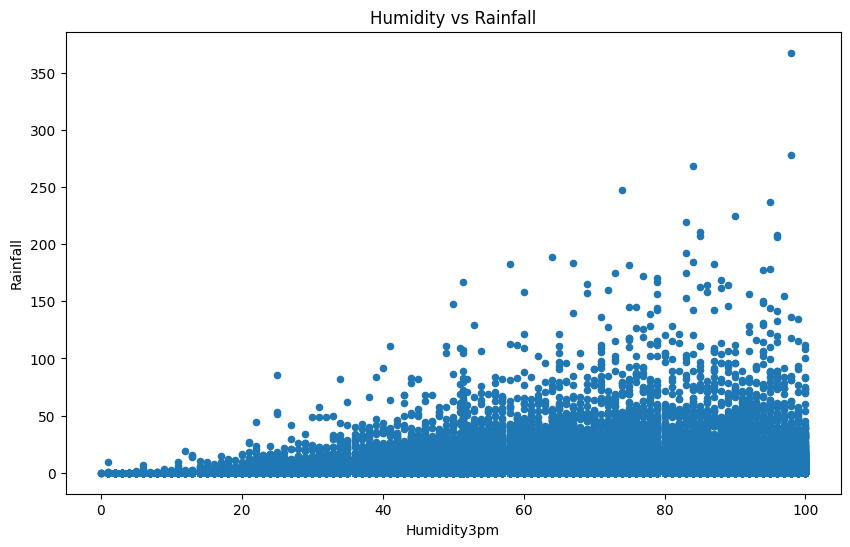

In [41]:
df_numer.plot(kind='scatter',x='Humidity3pm', y='Rainfall',
               figsize=(10,6))
plt.title('Humidity vs Rainfall')

# Save Plot
plt.savefig("scatter_numer.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

plt.show()

Dari grafik scatter tersebut di dapatkan hasil bahwa semakin tinggi tingkat kelemebapannya maka semakin tinggi juga curah hujannya. Namun perlu diperbaiki lagi dikarenakan masih ada data berada di angka 0.

### Re-group data

In [42]:
re_group = ['MinTemp','MaxTemp','Temp9am','WindSpeed9am','WindSpeed3pm','Humidity9am','Pressure9am']

df_pred = df_pred.drop(columns=re_group)
df_pred.head(5)

,Location,Rainfall,WindGustDir,WindGustSpeed,Humidity3pm,Pressure3pm,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,Albury,0.6,W,44.0,22.0,1007.1,21.8,No,No,1,12,2008
1,Albury,0.0,WNW,44.0,25.0,1007.8,24.3,No,No,2,12,2008
2,Albury,0.0,WSW,46.0,30.0,1008.7,23.2,No,No,3,12,2008
3,Albury,0.0,NE,24.0,16.0,1012.8,26.5,No,No,4,12,2008
4,Albury,1.0,W,41.0,33.0,1006.0,29.7,No,No,5,12,2008


# 6. DATA PREPROCESSING
## Inspect Numeric Data
### Location

In [43]:
df_num_loc = pd.DataFrame(
    {
        "Location":df_pred["Location"].unique(),
        "location_num":df_categ["Location"].unique()
    }
).sort_values(by="location_num", ascending=True)

df_num_loc = df_num_loc.set_index(keys="location_num",drop=True)
df_num_loc

,Location
location_num,
0,Adelaide
1,Albury
2,AliceSprings
3,BadgerysCreek
4,Ballarat
5,Bendigo
6,Brisbane
7,Cairns
8,Canberra


### WindGustDir

In [44]:
df_num_wind = pd.DataFrame(
    {
        "WindGustDir":df_pred["WindGustDir"].unique(),
        "wind_gust_dir_num":df_categ["WindGustDir"].unique()
    }
).sort_values(by="wind_gust_dir_num", ascending=True)

df_num_wind = df_num_wind.set_index(keys="wind_gust_dir_num",drop=True)
df_num_wind

,WindGustDir
wind_gust_dir_num,
0,E
1,ENE
2,ESE
3,N
4,NE
5,NNE
6,NNW
7,NW
8,S


## Advance Data Preprocessing
### Replace category column with encode label

In [45]:
df_pred['Location']=df_categ['Location']
df_pred['WindGustDir']=df_categ['WindGustDir']
df_pred['RainToday']=df_categ['RainToday']
df_pred['RainTomorrow']=df_categ['RainTomorrow']
df_pred.head(5)

,Location,Rainfall,WindGustDir,WindGustSpeed,Humidity3pm,Pressure3pm,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,1,0.6,13,44.0,22.0,1007.1,21.8,0,0,1,12,2008
1,1,0.0,14,44.0,25.0,1007.8,24.3,0,0,2,12,2008
2,1,0.0,15,46.0,30.0,1008.7,23.2,0,0,3,12,2008
3,1,0.0,4,24.0,16.0,1012.8,26.5,0,0,4,12,2008
4,1,1.0,13,41.0,33.0,1006.0,29.7,0,0,5,12,2008


# 7. PENDEFINISIAN MODEL (1)
Metode pengujian yang akan digunakan pada project kali ini adalah metode Logistic Regression dengan pembanding Random Forest Classifier, Decision Tree Classifier, Naive Bayes, dan K-Nearest Neighbors. Logistic Regression adalah sebuah algoritma klasifikasi untuk mencari hubungan antara fitur (input) diskrit/kontinu dengan probabilitas hasil output diskrit tertentu.

Decision Tree membagi data menjadi himpunan bagian berdasarkan variabel inputnya. Algoritma ini merupakan jenis diagram alir yang membantu dalam proses pengambilan keputusan. Decision Tree ini menjadi alat pendukung keputusan yang menggunakan grafik atau model seperti pohon.

Sedangkan Random Forest berfungsi karena menggabungkan prediksi dari beberapa algoritma machine learning untuk membuat prediksi yang lebih akurat daripada model individual. Ini menggunakan bias rendah dan varians tinggi untuk mengurangi kesalahan.

In [46]:
#Membuat variabel x untuk menampung semua kolom kecuali RainTomorrow
x=df_pred.drop(columns=['RainTomorrow'])

#Membuat variabel y untuk menampung kolom RainTomorrow
y=df_pred['RainTomorrow']

In [47]:
#Split x and y into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3, random_state=0)

In [48]:
#Standarisasi data
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

# 8. PELATIHAN MODEL 

In [49]:
#Membuat model Logistic Regression
lreg_model = LogisticRegression(penalty = 'l2', random_state = 8)

In [50]:
#Membuat model Support Vector Machine
svm_model = svm.SVC(kernel='linear')

In [51]:
#Membuat model K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=16)

In [52]:
#Membuat model Random Forest Classifier
rfc_model = RandomForestClassifier(n_estimators=100)

In [53]:
#Membuat model Decision Tree Classifier
dtc_model = DecisionTreeClassifier(criterion="entropy", max_depth=3)

In [54]:
#Membuat model Naive Bayes
gnb_model = GaussianNB()

# 9. Evaluasi Model
## Logistic Regression
### Part 1

In [55]:
#Model Training Logistic Regression
lreg_model = lreg_model.fit(x_train, y_train)

In [56]:
#Predict Probabilitas
lreg_model.predict_proba(x_train)

array([[0.71242414, 0.28757586],
       [0.97188727, 0.02811273],
       [0.95267061, 0.04732939],
       ...,
       [0.82227577, 0.17772423],
       [0.57083838, 0.42916162],
       [0.83792211, 0.16207789]])

In [57]:
#Score dari data training
lreg_model.score(x_train,y_train)

0.8432393731884477

In [58]:
#Predict data
y_pred_lreg=lreg_model.predict(x_test)
y_pred_lreg

array([0, 0, 0, ..., 0, 0, 1])

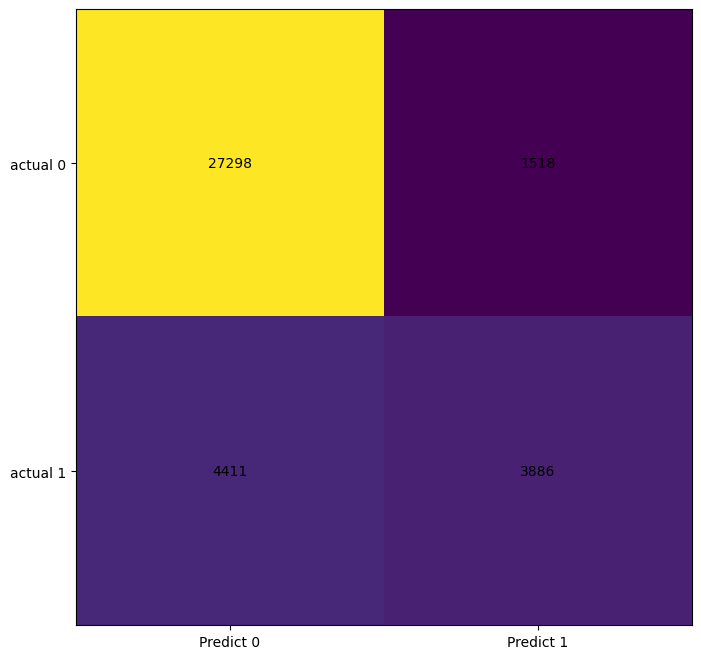

In [59]:
#Membuat visualisasi confusion matrix
cm = confusion_matrix(y_test,y_pred_lreg)
fig, ax= plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),
             ticklabels=('Predict 0','Predict 1'))
ax.yaxis.set(ticks=(0,1),
             ticklabels=('actual 0', 'actual 1'))
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i,j], ha='center', va='center',
               color='black')
        
# Save Plot
plt.savefig("confusion_matrix_1.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')
plt.show()

In [60]:
#Accuracy Score
lreg_model.score(x_test,y_test)

0.8402446582060195

In [61]:
#Classification Report Logistic Regression Part 1
print(classification_report(y_test,y_pred_lreg))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     28816
           1       0.72      0.47      0.57      8297

    accuracy                           0.84     37113
   macro avg       0.79      0.71      0.73     37113
weighted avg       0.83      0.84      0.83     37113



In [62]:
#Ringkasan Evaluasi Model Logistic Regression Part 1
print('Ringkasan Evaluasi Model Logistic Regression Part 1')
print("")
print('Akurasi :', bold,round(accuracy_score(y_test, y_pred_lreg),4),normal)
print('Presisi :', bold,round(precision_score(y_test,y_pred_lreg),4),normal)
print('Recall :', bold,round(recall_score(y_test,y_pred_lreg),4),normal)
print('F1 Score :', bold,round(f1_score(y_test,y_pred_lreg),4),normal)

Ringkasan Evaluasi Model Logistic Regression Part 1

Akurasi :  0.8402 
Presisi :  0.7191 
Recall :  0.4684 
F1 Score :  0.5673 


### Find the best feature

In [63]:
#melihat feature importance
importance=lreg_model.coef_[0]
sorted_index=np.argsort(importance)
labels=x.columns[sorted_index]
df_importance=pd.DataFrame({'Feature Name': labels,
                          'Feature Importance' : importance[sorted_index]})
df_importance=df_importance.sort_values(by=['Feature Importance'], ascending=False)
df_importance

,Feature Name,Feature Importance
10,Humidity3pm,1.351978
9,WindGustSpeed,0.483087
8,RainToday,0.221132
7,Rainfall,0.070831
6,Month,0.030453
5,Temp3pm,0.026373
4,Year,0.001515
3,Day,-0.000238
2,WindGustDir,-0.014330
1,Location,-0.043503


### Removing features that have no effect

In [64]:
df_pred2 = df_pred.drop(columns=[
    "Day",
    "WindGustDir",
    "Pressure3pm",
    "Temp3pm",
    "Month",
    "Year"
])
df_pred2.head(2)

,Location,Rainfall,WindGustSpeed,Humidity3pm,RainToday,RainTomorrow
0,1,0.6,44.0,22.0,0,0
1,1,0.0,44.0,25.0,0,0


# Model Definition - Part 2

In [65]:
x_2=df_pred2.drop(columns=['RainTomorrow'])
y_2=df_pred2['RainTomorrow']

x_train2, x_test2, y_train2,y_test2=train_test_split(x_2,y_2, test_size=0.3)

x_train2=scaler.fit_transform(x_train2)
x_test2=scaler.fit_transform(x_test2)

lreg_model_2 = LogisticRegression(penalty = 'l2', random_state = 8)
lreg_model_2.fit(x_train2,y_train2)

LogisticRegression(random_state=8)

# Logistic Regression
### Part 2

In [66]:
#Predict Probabilitas part 2
lreg_model_2.predict_proba(x_train2)

array([[0.85737391, 0.14262609],
       [0.8189182 , 0.1810818 ],
       [0.97995613, 0.02004387],
       ...,
       [0.11417887, 0.88582113],
       [0.98162196, 0.01837804],
       [0.4878329 , 0.5121671 ]])

In [67]:
#Score dari data training part 2
lreg_model_2.score(x_train2,y_train2)

0.8399944570828088

In [68]:
#Predict data part 2
y_pred_lreg_2=lreg_model_2.predict(x_test2)
y_pred_lreg_2

array([0, 0, 0, ..., 0, 0, 0])

In [69]:
#Testing model part 2
lreg_model_2.score(x_test2,y_test2)

0.8403793818877482

In [70]:
#Classification Report Logistic Regression Part 2
print(classification_report(y_test2,y_pred_lreg_2))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     28894
           1       0.72      0.46      0.56      8219

    accuracy                           0.84     37113
   macro avg       0.79      0.70      0.73     37113
weighted avg       0.83      0.84      0.83     37113



In [71]:
#Ringkasan Evaluasi Model Logistic Regression Part 2
print('Ringkasan Evaluasi Model Logistic Regression Part 2')
print("")
print('Akurasi :', bold,round(accuracy_score(y_test2, y_pred_lreg_2),4),normal)
print('Presisi :', bold,round(precision_score(y_test2,y_pred_lreg_2),4),normal)
print('Recall :', bold,round(recall_score(y_test2,y_pred_lreg_2),4),normal)
print('F1 Score :', bold,round(f1_score(y_test2,y_pred_lreg_2),4),normal)

Ringkasan Evaluasi Model Logistic Regression Part 2

Akurasi :  0.8404 
Presisi :  0.7203 
Recall :  0.4565 
F1 Score :  0.5588 


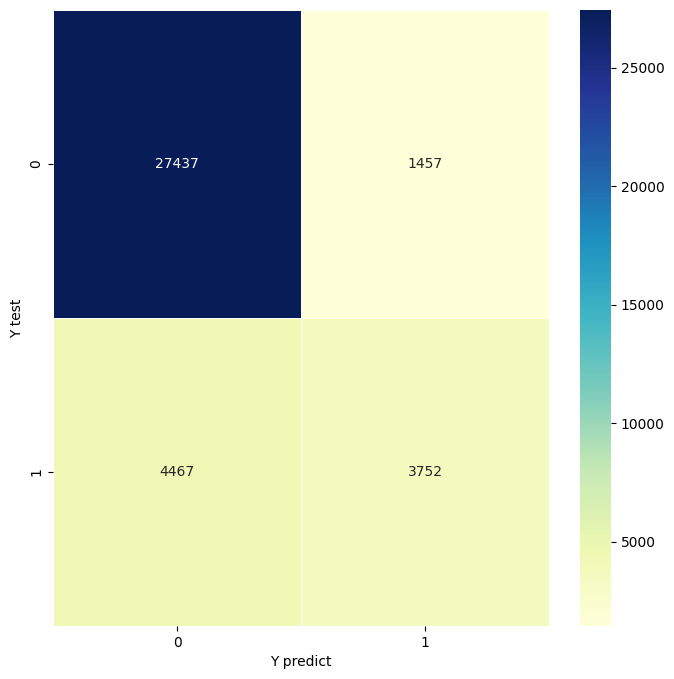

In [72]:
lg2 = confusion_matrix(y_test2, y_pred_lreg_2)
f, ax = plt.subplots(figsize=(8,8))
sns.heatmap(lg2, annot=True, linewidth=0.7, fmt='g', ax=ax, cmap="YlGnBu")
plt.xlabel('Y predict')
plt.ylabel('Y test')

# Save Plot
plt.savefig("confusion_matrix_2.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

plt.show()

## Support Vector Machine

In [73]:
#Model Training Support Vector Machine
svm_model = svm_model.fit(x_train2, y_train2)

In [74]:
#Predict data
y_pred_svm = svm_model.predict(x_test2)

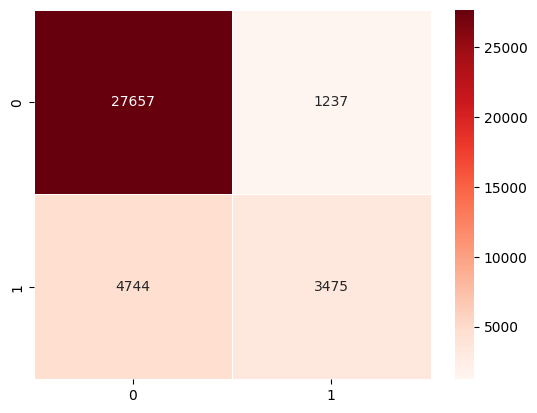

              precision    recall  f1-score   support

           0       0.85      0.96      0.90     28894
           1       0.74      0.42      0.54      8219

    accuracy                           0.84     37113
   macro avg       0.80      0.69      0.72     37113
weighted avg       0.83      0.84      0.82     37113



In [75]:
cm_svm = confusion_matrix(y_test2, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt="d", linewidths=.5, cmap = 'Reds',)

# Save Plot
plt.savefig("confusion_matrix_3.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

plt.show()
print(classification_report(y_test2, y_pred_svm))

In [76]:
#Ringkasan Evaluasi Model Support Vector Machine
print('Ringkasan Evaluasi Model Support Vector Machine')
print("")
print('Akurasi :', bold,round(accuracy_score(y_test2, y_pred_svm),4),normal)
print('Presisi :', bold,round(precision_score(y_test2,y_pred_svm),4),normal)
print('Recall :', bold,round(recall_score(y_test2,y_pred_svm),4),normal)
print('F1 Score :', bold,round(f1_score(y_test2,y_pred_svm),4),normal)

Ringkasan Evaluasi Model Support Vector Machine

Akurasi :  0.8388 
Presisi :  0.7375 
Recall :  0.4228 
F1 Score :  0.5375 


# Model Evaluation - KNN

In [77]:
# Train the model using the training sets
knn_model = knn_model.fit(x_train2, y_train2)

In [78]:
# Predict the response for test dataset
y_pred_knn = knn_model.predict(x_test2)

In [79]:
#Testing model
knn_model.score(x_test2,y_test2)

0.8388435319160402

In [80]:
#Classification Report K-Nearest Neighbors
print(classification_report(y_test2,y_pred_knn))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     28894
           1       0.72      0.44      0.55      8219

    accuracy                           0.84     37113
   macro avg       0.79      0.70      0.73     37113
weighted avg       0.83      0.84      0.82     37113



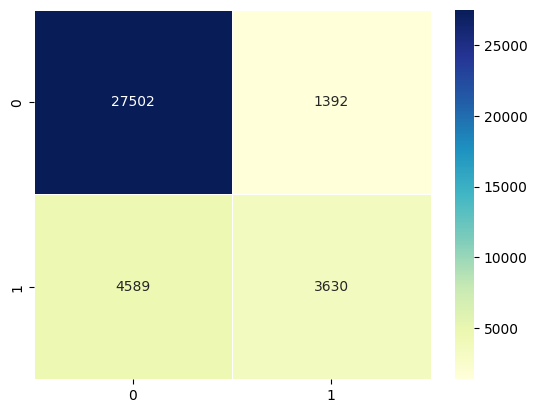

In [81]:
cm_knn = confusion_matrix(y_test2, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt="d", linewidths=.5, cmap = 'YlGnBu',)

# Save Plot
plt.savefig("confusion_matrix_4.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

plt.show()

In [82]:
#Ringkasan Evaluasi Model K-Nearest Neighbors
print('Ringkasan Evaluasi Model K-Nearest Neighbors')
print("")
print('Akurasi :', bold,round(accuracy_score(y_test2, y_pred_knn),4),normal)
print('Presisi :', bold,round(precision_score(y_test2,y_pred_knn),4),normal)
print('Recall :', bold,round(recall_score(y_test2,y_pred_knn),4),normal)
print('F1 Score :', bold,round(f1_score(y_test2,y_pred_knn),4),normal)

Ringkasan Evaluasi Model K-Nearest Neighbors

Akurasi :  0.8388 
Presisi :  0.7228 
Recall :  0.4417 
F1 Score :  0.5483 


# Naive Bayes

In [83]:
# Train the model using the training sets
gnb_model = gnb_model.fit(x_train2, y_train2)

In [84]:
# Predict the response for test dataset
y_pred_gnb = gnb_model.predict(x_test2)

In [85]:
#Classification Report Naive Bayes
print(classification_report(y_test2,y_pred_gnb))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88     28894
           1       0.61      0.45      0.51      8219

    accuracy                           0.81     37113
   macro avg       0.73      0.68      0.70     37113
weighted avg       0.80      0.81      0.80     37113



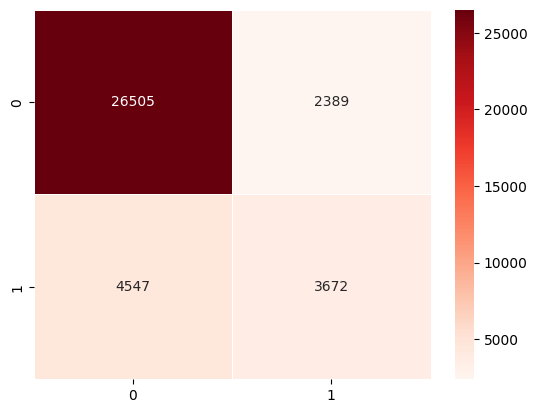

In [86]:
cm_nb = confusion_matrix(y_test2, y_pred_gnb)
sns.heatmap(cm_nb, annot=True, fmt="d", linewidths=.5, cmap = 'Reds',)

# Save Plot
plt.savefig("confusion_matrix_5.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

plt.show()

In [87]:
#Ringkasan Evaluasi Model Naive Bayes
print('Ringkasan Evaluasi Model Naive Bayes')
print("")
print('Akurasi :', bold,round(accuracy_score(y_test2, y_pred_gnb),4),normal)
print('Presisi :', bold,round(precision_score(y_test2,y_pred_gnb),4),normal)
print('Recall :', bold,round(recall_score(y_test2,y_pred_gnb),4),normal)
print('F1 Score :', bold,round(f1_score(y_test2,y_pred_gnb),4),normal)

Ringkasan Evaluasi Model Naive Bayes

Akurasi :  0.8131 
Presisi :  0.6058 
Recall :  0.4468 
F1 Score :  0.5143 


# Decision Tree Classifier

In [88]:
# Train the model using the training sets
dtc_model = dtc_model.fit(x_train2,y_train2)

In [89]:
# Predict the response for test dataset
y_pred_dtc = dtc_model.predict(x_test2)

In [90]:
#Classification Report Decition Tree Classifier
print(classification_report(y_test2,y_pred_dtc))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90     28894
           1       0.69      0.44      0.54      8219

    accuracy                           0.83     37113
   macro avg       0.78      0.69      0.72     37113
weighted avg       0.82      0.83      0.82     37113



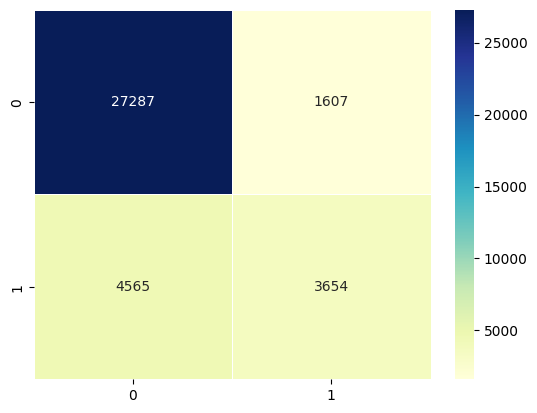

In [91]:
cm_dct = confusion_matrix(y_test2, y_pred_dtc)
sns.heatmap(cm_dct, annot=True, fmt="d", linewidths=.5, cmap = 'YlGnBu',)

# Save Plot
plt.savefig("confusion_matrix_6.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

plt.show()

In [92]:
#Ringkasan Evaluasi Model Decision Tree Classifier
print('Ringkasan Evaluasi Model Decision Tree Classifier')
print("")
print('Akurasi :', bold,round(accuracy_score(y_test2, y_pred_dtc),4),normal)
print('Presisi :', bold,round(precision_score(y_test2,y_pred_dtc),4),normal)
print('Recall :', bold,round(recall_score(y_test2,y_pred_dtc),4),normal)
print('F1 Score :', bold,round(f1_score(y_test2,y_pred_dtc),4),normal)

Ringkasan Evaluasi Model Decision Tree Classifier

Akurasi :  0.8337 
Presisi :  0.6945 
Recall :  0.4446 
F1 Score :  0.5421 


# Random Forest Classifier

In [93]:
# Train the model using the training sets
rfc_model = rfc_model.fit(x_train2,y_train2) 

In [94]:
# Predict the response for test dataset
y_pred_rfc = rfc_model.predict(x_test2)

In [95]:
#Classification Report Random Forest Classifier
print(classification_report(y_test2,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89     28894
           1       0.62      0.50      0.56      8219

    accuracy                           0.82     37113
   macro avg       0.74      0.71      0.72     37113
weighted avg       0.81      0.82      0.82     37113



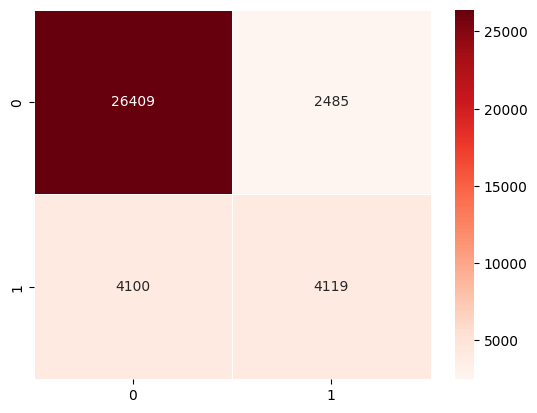

In [96]:
cm_rfc = confusion_matrix(y_test2, y_pred_rfc)
sns.heatmap(cm_rfc, annot=True, fmt="d", linewidths=.5, cmap = 'Reds',)

# Save Plot
plt.savefig("confusion_matrix_7.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

plt.show()

In [97]:
#Ringkasan Evaluasi Model Random Forest Classifier
print('Ringkasan Evaluasi Model Random Forest Classifier')
print("")
print('Akurasi :', bold,round(accuracy_score(y_test2, y_pred_rfc),4),normal)
print('Presisi :', bold,round(precision_score(y_test2,y_pred_rfc),4),normal)
print('Recall :', bold,round(recall_score(y_test2,y_pred_rfc),4),normal)
print('F1 Score :', bold,round(f1_score(y_test2,y_pred_rfc),4),normal)

Ringkasan Evaluasi Model Random Forest Classifier

Akurasi :  0.8226 
Presisi :  0.6237 
Recall :  0.5012 
F1 Score :  0.5558 


In [98]:
df_pred2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123710 entries, 0 to 145458
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       123710 non-null  int32  
 1   Rainfall       123710 non-null  float64
 2   WindGustSpeed  123710 non-null  float64
 3   Humidity3pm    123710 non-null  float64
 4   RainToday      123710 non-null  int32  
 5   RainTomorrow   123710 non-null  int32  
dtypes: float64(3), int32(3)
memory usage: 5.2 MB


In [99]:
df_pred2.head(5)

,Location,Rainfall,WindGustSpeed,Humidity3pm,RainToday,RainTomorrow
0,1,0.6,44.0,22.0,0,0
1,1,0.0,44.0,25.0,0,0
2,1,0.0,46.0,30.0,0,0
3,1,0.0,24.0,16.0,0,0
4,1,1.0,41.0,33.0,0,0


# Check Numeric of Prediction
## Location

In [100]:
df_check_loc = pd.DataFrame(
    {
        "Location":df_pred2["Location"].unique(),
        "location_num":df_categ["Location"].unique()
    }
).sort_values(by="location_num", ascending=True)

df_check_loc = df_check_loc.set_index(keys="location_num",drop=True)
df_check_loc

,Location
location_num,
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8


# Rainfall

In [101]:
df_check_rfall = pd.DataFrame(
    {
        "Rainfall":df_pred2["Rainfall"].unique(),
        "rainfall_num":df_pred2["Rainfall"].unique()
    }
).sort_values(by="rainfall_num", ascending=True)

df_check_rfall = df_check_rfall.set_index(keys="rainfall_num",drop=True)
df_check_rfall

,Rainfall
rainfall_num,
0.0,0.0
0.1,0.1
0.2,0.2
0.3,0.3
0.4,0.4
0.5,0.5
0.6,0.6
0.7,0.7
0.8,0.8


# WindGustSpeed

In [102]:
df_check_wdgst = pd.DataFrame(
    {
        "WindGustSpeed":df_pred2["WindGustSpeed"].unique(),
        "windgst_num":df_pred2["WindGustSpeed"].unique()
    }
).sort_values(by="windgst_num", ascending=True)

df_check_wdgst = df_check_wdgst.set_index(keys="windgst_num",drop=True)
df_check_wdgst

,WindGustSpeed
windgst_num,
7.0,7.0
9.0,9.0
11.0,11.0
13.0,13.0
15.0,15.0
17.0,17.0
19.0,19.0
20.0,20.0
22.0,22.0


# Humidity3pm

In [103]:
df_check_hum = pd.DataFrame(
    {
        "Humidity3pm":df_pred2["Humidity3pm"].unique(),
        "hum_num":df_pred2["Humidity3pm"].unique()
    }
).sort_values(by="hum_num", ascending=True)

df_check_hum = df_check_hum.set_index(keys="hum_num",drop=True)
df_check_hum

,Humidity3pm
hum_num,
0.000000,0.000000
1.000000,1.000000
2.000000,2.000000
3.000000,3.000000
4.000000,4.000000
5.000000,5.000000
6.000000,6.000000
7.000000,7.000000
8.000000,8.000000


# RainToday

In [104]:
df_check_rtd = pd.DataFrame(
    {
        "RainToday":df_pred2["RainToday"].unique(),
        "rtd_num":df_pred2["RainToday"].unique()
    }
).sort_values(by="rtd_num", ascending=True)

df_check_rtd = df_check_rtd.set_index(keys="rtd_num",drop=True)
df_check_rtd

,RainToday
rtd_num,
0,0
1,1


# Cek RMSE Value

In [105]:
# RMSE for Logistic Regression
rmse_lreg = mean_squared_error(y_test2, y_pred_lreg_2)
print("Value of Root Mean Square Error (Logistic Regression) = ", bold, round(rmse_lreg, 3))

Value of Root Mean Square Error (Logistic Regression) =   0.16


In [106]:
# RMSE for Support Vector Machine
rmse_svm = mean_squared_error(y_test2, y_pred_svm)
print("Value of Root Mean Square Error (Support Vector Machine (SVM)) =", bold, round(rmse_svm,3))

Value of Root Mean Square Error (Support Vector Machine (SVM)) =  0.161


In [107]:
# RMSE for K-Nearest Neighbors
rmse_knn = mean_squared_error(y_test2, y_pred_knn)
print("Value of Root Mean Square Error (K-Nearest Neighbors) =", bold, round(rmse_knn,3))

Value of Root Mean Square Error (K-Nearest Neighbors) =  0.161


In [108]:
# RMSE for Naive Bayes
rmse_gnb = mean_squared_error(y_test2, y_pred_gnb)
print("Value of Root Mean Square Error (Naive Bayes) =", bold, round(rmse_gnb,3))

Value of Root Mean Square Error (Naive Bayes) =  0.187


In [109]:
# RMSE for Decision Tree Classifier
rmse_dtc = mean_squared_error(y_test2, y_pred_dtc)
print("Value of Root Mean Square Error (Decision Tree Classifier) =", bold, round(rmse_dtc,3))

Value of Root Mean Square Error (Decision Tree Classifier) =  0.166


In [110]:
# RMSE for Random Forest Classifier
rmse_rfc = mean_squared_error(y_test2, y_pred_rfc)
print("Value of Root Mean Square Error (Random Forest Classifier) =", bold, round(rmse_rfc,3))

Value of Root Mean Square Error (Random Forest Classifier) =  0.177


# 10. MODEL INFERENCE

In [111]:
model_infr = {
    "Location":[1, 2, 3, 4],
    "Rainfall":[0.0, 0.0, 0.0, 0.6],
    "WindGustSpeed":[44.0, 44.0, 46.0, 24.0],
    "Humidity3pm":[22.0, 25.0, 30.0, 16.0],
    "RainToday":[0, 0, 0, 1],
}

data_uji = pd.DataFrame(model_infr)
data_uji.head(5)

,Location,Rainfall,WindGustSpeed,Humidity3pm,RainToday
0,1,0.0,44.0,22.0,0
1,2,0.0,44.0,25.0,0
2,3,0.0,46.0,30.0,0
3,4,0.6,24.0,16.0,1


In [112]:
sc = StandardScaler()
data_uji = sc.fit_transform(data_uji)

In [113]:
pred1 = lreg_model_2.predict(data_uji)
pred2 = svm_model.predict(data_uji)
pred3 = knn_model.predict(data_uji)
pred4 = gnb_model.predict(data_uji)
pred5 = dtc_model.predict(data_uji)
pred6 = rfc_model.predict(data_uji)

print("Logistic Regression Model = ",pred1)
print("Support Virtual Machine Model = ",pred2)
print("KNN Model = ",pred3)
print("Naive Bayes = ",pred4)
print("Decision Tree = ",pred5)
print("Random Forest = ",pred6)

Logistic Regression Model =  [0 0 1 0]
Support Virtual Machine Model =  [0 0 1 0]
KNN Model =  [0 0 1 0]
Naive Bayes =  [0 0 0 1]
Decision Tree =  [0 0 1 0]
Random Forest =  [0 0 1 0]


In [114]:
pickle.dump(lreg_model_2, open('lreg_model.pkl','wb'))
pickle.dump(svm_model, open('svm_model.pkl','wb'))

# 11. KESIMPULAN
Berdasarkan analisis yang telah dilakukan, maka dapat diambil kesimpulan sebagai berikut.

- Berdasarkan parameter yang tersedia, terpilihlah 8 parameter yang mempengaruhi prediksi hujan, antara lain seperti:location, rainfall, WindGustSpeed, Humidity3pm, dan RainToday.
- Dari 6 metode pengujian dengan masing-masing model yaitu Logistic regression, SVM, KNN, Naive Bayes, Decision Tree Classifier, dan Random Forest Classifier dengan masing-masing model memiliki nilai akurasi sebesar 83.78%,83.84%,83.75%,81,29%,83.09%,dan 82.16%.
- Model terbaik dengan best configuration untuk memprediksi hujan ialah model Support Vector Machine (SVM) karena memiliki nilai akurasi sebesar 83.75% dengan nilai RMSE yang kecil dibanding yang lain yaitu sebesar 0.162